In [1]:
import pandas as pd

df_movies = pd.read_csv('movies.csv')
shape_movies = df_movies.shape
print('Shape of movies.csv:', shape_movies)

Shape of movies.csv: (9742, 3)


In [2]:
df_ratings = pd.read_csv('ratings.csv')
shape_ratings = df_ratings.shape

print('Shape of ratings.csv:', shape_ratings)
print(df_ratings.head())

Shape of ratings.csv: (100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [3]:
unique_user_ids = df_ratings['userId'].nunique()
print('Number of unique userId in ratings.csv:', unique_user_ids)

Number of unique userId in ratings.csv: 610


In [4]:
most_rated_movie_id = df_ratings['movieId'].value_counts().idxmax()
most_rated_movie_count = df_ratings['movieId'].value_counts().max()

#title of the movie with the most ratings
most_rated_movie_title = df_movies[df_movies['movieId'] == most_rated_movie_id]['title'].values[0]

print('Movie with the maximum number of user ratings:', most_rated_movie_title)
print('Number of ratings:', most_rated_movie_count)

Movie with the maximum number of user ratings: Forrest Gump (1994)
Number of ratings: 329


In [10]:
df_tags = pd.read_csv('tags.csv')
df_movies = pd.read_csv('movies.csv')

#movieId for "The Matrix (1999)"
movie = df_movies[df_movies['title'] == 'Matrix, The (1999)']
if not movie.empty:
    movie_id = movie['movieId'].values[0]
    
    # Get all tags for The Matrix
    tags = df_tags[df_tags['movieId'] == movie_id]
    
    # Get unique tags (case-insensitive)
    unique_tags = tags['tag'].str.lower().unique()
    
    print("Unique tags for 'The Matrix (1999)':")
    for tag in sorted(unique_tags):
        print(f"- {tag}")
    
    print(f"\nTotal number of unique tags: {len(unique_tags)}")

Unique tags for 'The Matrix (1999)':
- alternate universe
- martial arts
- philosophy
- post apocalyptic
- sci-fi

Total number of unique tags: 5


In [14]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

#movieId for "Terminator 2: Judgment Day (1991)"
movie = df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']

if not movie.empty:
    movie_id = movie['movieId'].values[0]
    
    #all ratings for Terminator 2
    ratings = df_ratings[df_ratings['movieId'] == movie_id]
    average_rating = ratings['rating'].mean()
    
    print(f"Movie: Terminator 2: Judgment Day (1991)")
    print(f"Average Rating: {average_rating:.2f}")
    print(f"Number of Ratings: {len(ratings)}")

Movie: Terminator 2: Judgment Day (1991)
Average Rating: 3.97
Number of Ratings: 224


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

#movieId for "Fight Club (1999)"
fight_club = df_movies[df_movies['title'] == 'Fight Club (1999)']

if not fight_club.empty:
    fight_club_id = fight_club['movieId'].values[0]
    
    #all ratings for Fight Club
    fight_club_ratings = df_ratings[df_ratings['movieId'] == fight_club_id]
    
    avg_rating = fight_club_ratings['rating'].mean()
    median_rating = fight_club_ratings['rating'].median()
    mode_rating = fight_club_ratings['rating'].mode().values[0]
    
    print(f"Movie: Fight Club (1999)")
    print(f"Number of Ratings: {len(fight_club_ratings)}")
    print(f"Average Rating: {avg_rating:.2f}")
    print(f"Median Rating: {median_rating:.2f}")
    print(f"Mode Rating: {mode_rating:.2f}")
    
    #histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=fight_club_ratings, x='rating', bins=10, kde=True)
    plt.title('Distribution of Ratings for Fight Club (1999)')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.savefig('fight_club_ratings_distribution.png')
    plt.close()
    

C:\Users\ritwi\anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Movie: Fight Club (1999)
Number of Ratings: 218
Average Rating: 4.27
Median Rating: 4.50
Mode Rating: 5.00


In [19]:
# Step 1: Group the user ratings based on movieId and apply aggregation operations
ratings_grouped = df_ratings.groupby('movieId').agg(
    count_ratings=('rating', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join on movies dataframe and the grouped ratings dataframe
merged_df = pd.merge(df_movies, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_movies = merged_df[merged_df['count_ratings'] > 50]

In [29]:
print(f"\nNumber of movies with more than 50 ratings:", len(filtered_movies))
filtered_movies


Number of movies with more than 50 ratings: 436


,movieId,title,genres,count_ratings,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [31]:
most_popular_movie = filtered_movies.loc[filtered_movies['mean_rating'].idxmax()]

most_popular_title = most_popular_movie['title']
most_popular_mean_rating = most_popular_movie['mean_rating']
most_popular_count_ratings = most_popular_movie['count_ratings']

print('Most Popular Movie Based on Average User Ratings:')
print('Title:', most_popular_title)
print('Average Rating:', most_popular_mean_rating)
print('Number of Ratings:', most_popular_count_ratings)

Most Popular Movie Based on Average User Ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927
Number of Ratings: 317


Top 5 Popular Movies Based on Number of User Ratings:

Forrest Gump (1994)
Number of Ratings: 329
Average Rating: 4.16
Genres: Comedy|Drama|Romance|War

Shawshank Redemption, The (1994)
Number of Ratings: 317
Average Rating: 4.43
Genres: Crime|Drama

Pulp Fiction (1994)
Number of Ratings: 307
Average Rating: 4.20
Genres: Comedy|Crime|Drama|Thriller

Silence of the Lambs, The (1991)
Number of Ratings: 279
Average Rating: 4.16
Genres: Crime|Horror|Thriller

Matrix, The (1999)
Number of Ratings: 278
Average Rating: 4.19
Genres: Action|Sci-Fi|Thriller


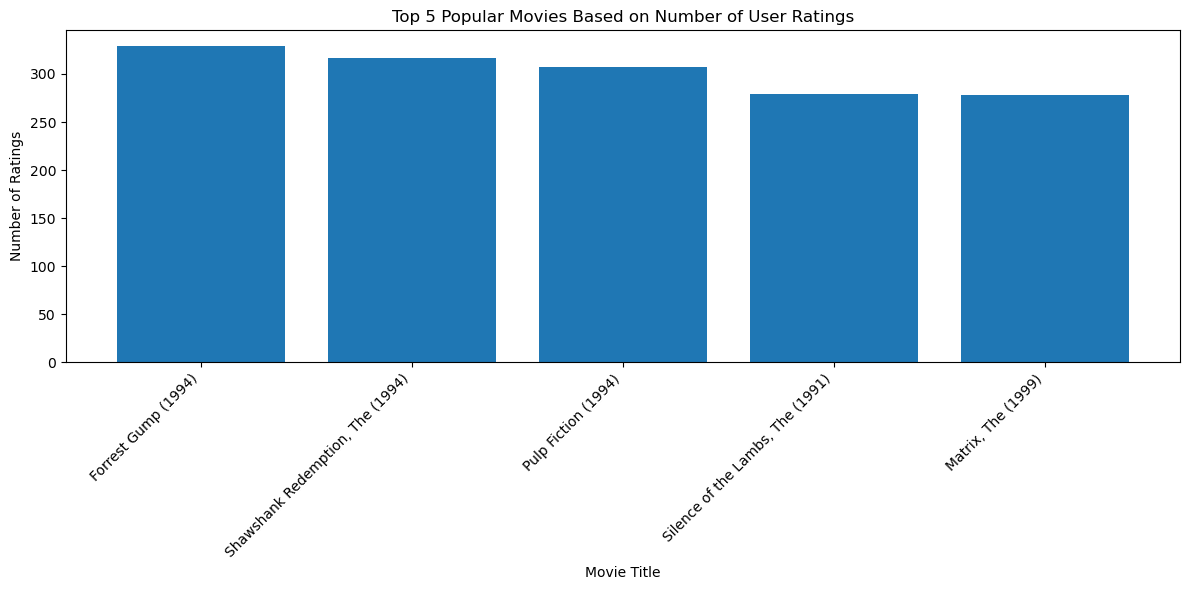

In [35]:
top_5_popular = filtered_movies.sort_values('count_ratings', ascending=False).head(5)

print("Top 5 Popular Movies Based on Number of User Ratings:")
for index, movie in top_5_popular.iterrows():
    print(f"\n{movie['title']}")
    print(f"Number of Ratings: {movie['count_ratings']}")
    print(f"Average Rating: {movie['mean_rating']:.2f}")
    print(f"Genres: {movie['genres']}")

#bar plot of the top 5 movies
plt.figure(figsize=(12, 6))
plt.bar(top_5_popular['title'], top_5_popular['count_ratings'])
plt.title('Top 5 Popular Movies Based on Number of User Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_5_popular_movies.png')


In [45]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False)]
sorted_sci_fi_movies = sci_fi_movies.sort_values('count_ratings', ascending=False)
third_most_popular = sorted_sci_fi_movies.iloc[2]

In [47]:
third_most_popular

movieId                                       480
title                        Jurassic Park (1993)
genres           Action|Adventure|Sci-Fi|Thriller
count_ratings                                 238
mean_rating                                  3.75
Name: 418, dtype: object

In [51]:
sorted_sci_fi_movies.head()

,movieId,title,genres,count_ratings,mean_rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


In [53]:
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')
ratings_df = pd.read_csv('ratings.csv')

ratings_count = ratings_df.groupby('movieId')['rating'].count().reset_index(name='rating_count')
movies_with_ratings = pd.merge(movies_df, ratings_count, on='movieId', how='left')
popular_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]
result = pd.merge(popular_movies, links_df, on='movieId', how='inner')

output_file = 'popular_movies_with_links.csv'
result.to_csv(output_file, index=False)

print(f"Dataset shape: {result.shape}")
print("\
Column names:")
print(result.columns.tolist())
print("\
First few rows:")
print(result.head().to_string())
print(f"\
Dataset saved to {output_file}")

# Count of movies per genre
genre_counts = result['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
print("\nNumber of movies per genre:")
print(genre_counts.to_string())

Dataset shape: (436, 6)
Column names:
['movieId', 'title', 'genres', 'rating_count', 'imdbId', 'tmdbId']
First few rows:
   movieId                    title                                       genres  rating_count  imdbId   tmdbId
0        1         Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         215.0  114709    862.0
1        2           Jumanji (1995)                   Adventure|Children|Fantasy         110.0  113497   8844.0
2        3  Grumpier Old Men (1995)                               Comedy|Romance          52.0  113228  15602.0
3        6              Heat (1995)                        Action|Crime|Thriller         102.0  113277    949.0
4        7           Sabrina (1995)                               Comedy|Romance          54.0  114319  11860.0
Dataset saved to popular_movies_with_links.csv

Number of movies per genre:
Comedy         176
Drama          160
Action         157
Adventure      126
Thriller       117
Sci-Fi          88
Crime           8

In [66]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

# Load the dataset
movies_df = pd.read_csv('popular_movies_with_links.csv')

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class' : 'sc-eb51e184-1 ljxVSS'})
    return float(imdb_rating.text) if imdb_rating else np.nan

#column for IMDB ratings
movies_df['imdb_rating'] = movies_df['imdbId'].apply(scrapper)

#movieId with the highest IMDB rating
highest_rating_movieId = movies_df.loc[movies_df['imdb_rating'].idxmax(), 'movieId']

#movieId of the "Sci-Fi" movie with the highest IMDB rating
sci_fi_movies = movies_df[movies_df['genres'].str.contains('Sci-Fi', na=False)]
highest_rating_sci_fi_movieId = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax(), 'movieId']

highest_rating_movieId, highest_rating_sci_fi_movieId

(318, 79132)

In [72]:
movies_df.to_csv('popular_movies_with_imdb_ratings.csv', index=False)